## Simple data analysis project

# VGsales

This dataset contains the records of video game sales. This notebook contains EDA of the dataset and all other processes like data understanding, cleaning etc. as per requirement.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('vgsales.csv') #reading the csv file into a dataframe

df.head() #displaying top 5 records of the dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### General description of each columns in the dataset

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

In [4]:
df.shape

(16598, 11)

### The dataset contains 16,598 records and 11 features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Here, year and publisher have some null value.

In [6]:
df.describe() #provides statistics of the numerical columns of the dataset

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Data cleaning and pre-processing

### Handling missing values

In [48]:
# checking for null values

features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1] #getting list of features

for feature in features_with_nan:
    print(feature, '=>', (df[feature].isnull().sum()*100/df.shape[0]), "% missing values")

Year => 1.6327268345583805 % missing values
Publisher => 0.34943969152909987 % missing values


#### from the outcome above, we can see that the year and publisher column has some missing values

In [49]:
# publisher also has some missing values
# thus a new label can be assigned to that missing value
df['Publisher'] = df['Publisher'].fillna('Missing')

In [50]:
df['Publisher'].isnull().sum()

0

In [51]:
# as for the year column, it contains year, and almost 1.6% of the values are missing. Thus, converting it into object form by labeling the year with missing realese year as unkown

df['Year'] = df['Year'].astype('object')
df['Year'].dtype

dtype('O')

In [52]:
df['Year'] = df['Year'].fillna('Unknown')
df['Year'].isnull().sum()

0

### Removing useless columns

In [53]:
# rank column can be represented by the index of the dataframe, thus it is not necessary

if df['Rank'].nunique()==df.shape[0]:
    print('Rank column has same number of values, thus it can be dropped')

Rank column has same number of values, thus it can be dropped


In [54]:
df.drop('Rank', axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Exploratory data analysis

### Anserwing some questions based on the dataset.

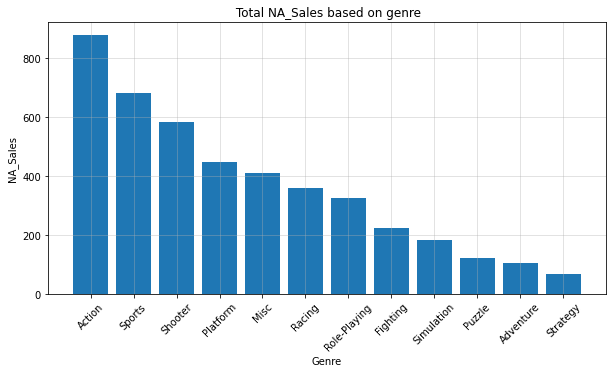

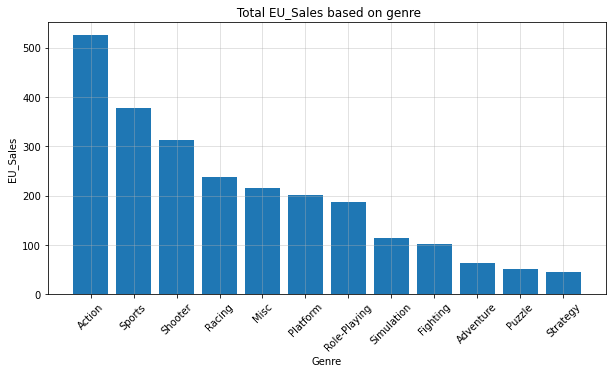

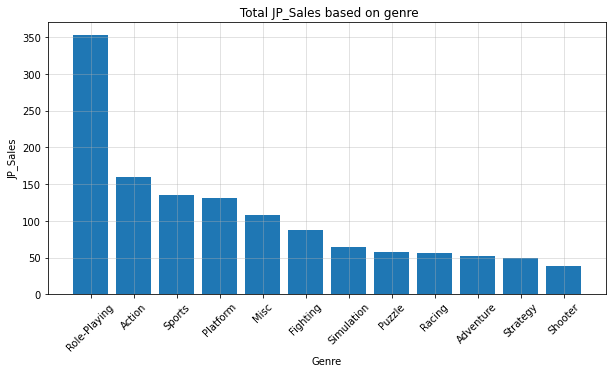

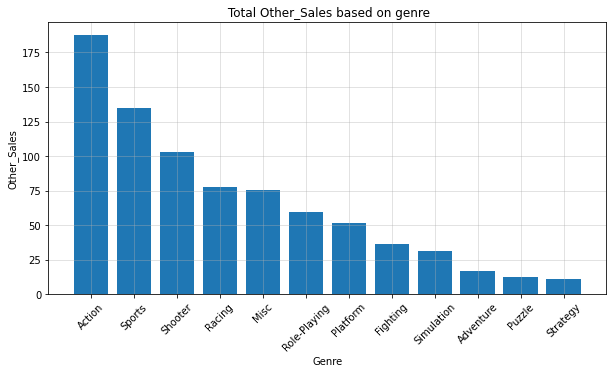

In [139]:
# Question 1: What is the most popular game genre on different geographic regions ?

def plot_bar(dataset, region):
    plt.figure(figsize=(10,5))
    data = pd.DataFrame(df.groupby('Genre')[region].sum()).reset_index().sort_values(region, ascending=False)
    plt.bar(x='Genre', height=region, data=data)
    plt.title(f' Total {region} based on genre')
    plt.xlabel('Genre')
    plt.ylabel(region)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.45)
    plt.show()
    
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i,region in enumerate(regions):
    plot_bar(df, region)

#### From the bar-charts above, we can see the total sales in millions for each genre across several regions in descending order. 
### Action, sports and shooter are the most popular genre across different regions while roleplay is ranked number 1 in Japan. 

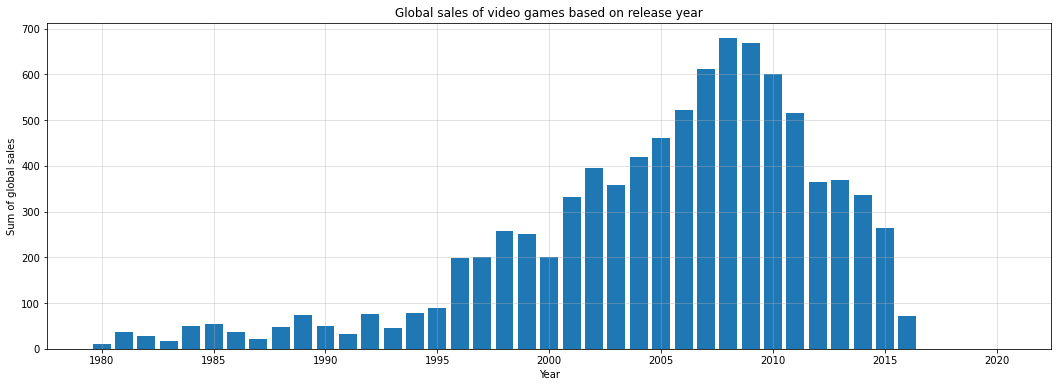

In [167]:
# Question 2: Games released in each year and total global sales made by them

data = df.copy()
data.drop(data[(data['Year']=='Unknown')].index, inplace=True) #Removing the records without release date

data = pd.DataFrame(data.groupby('Year')['Global_Sales'].sum().reset_index())
plt.figure(figsize=(18,6))
plt.bar(x='Year', height='Global_Sales', data=data)
plt.title('Global sales of video games based on release year')
plt.xlabel('Year')
plt.ylabel('Sum of global sales')
plt.grid(alpha=0.45)
plt.show()


#### This chart shows that, video games sales increased rapidly from 2004 and peaked at 2008, beyond that the sale began to decrease.

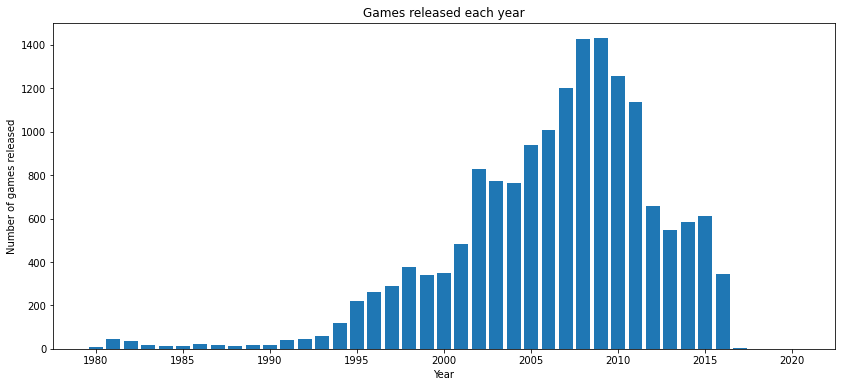

In [185]:
# visualizing the number of games released on each year.
data = df.copy()
data.drop(data[(data['Year']=='Unknown')].index, inplace=True) #Removing the records without release date

# getting the number of games released each year
data = pd.DataFrame(data.groupby('Year')['Name'].count().reset_index().rename(columns={'Name':'Games_released'}))

plt.figure(figsize=(14,6))
plt.bar(data=data, x='Year', height='Games_released')
plt.title('Games released each year')
plt.xlabel('Year')
plt.ylabel('Number of games released')
plt.show()

#### The number of games released had a significant impact on the global sales for each year. As more number of games were releasd from 2005 to 2010, the gaming industry had higher sales. Beyound 2009, less number of games were released thus, the global sales also began to fall.

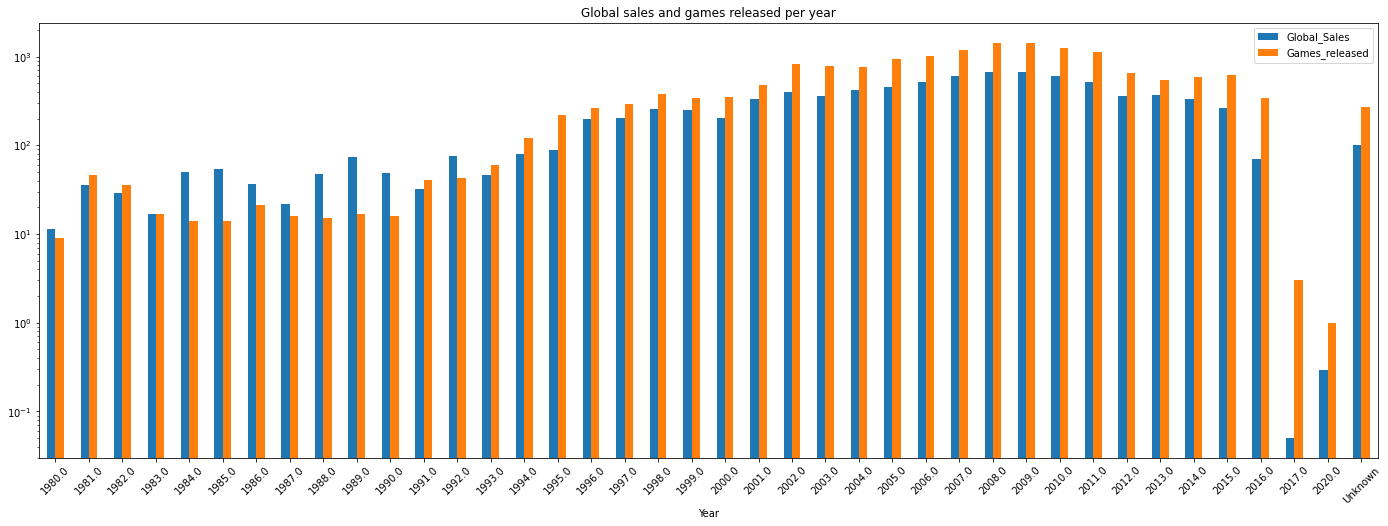

In [198]:
data = df.copy()
data = pd.DataFrame(data.groupby('Year').agg({'Global_Sales': 'sum', 'Name':'count'}).reset_index().rename(columns={'Name':'Games_released'}))
data.plot.bar(x='Year',rot=45, figsize=(24, 8))
plt.title('Global sales and games released per year')
plt.yscale('log')

In [206]:
# Question 4: Global sales distribution based on platform?

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


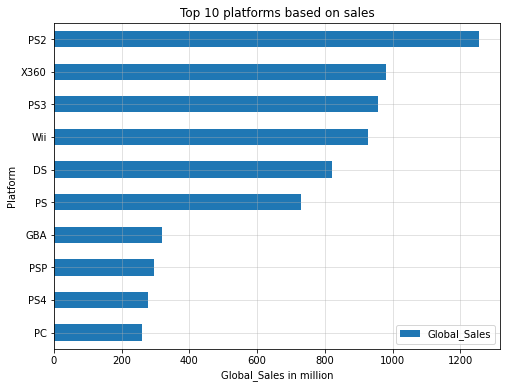

In [230]:
def platform_and_sales(dataset, region):
    data = dataset.copy()
    data = data.groupby('Platform')[region].sum().reset_index()
    data.nlargest(10, region).sort_values(region, ascending=True).plot.barh(x='Platform', figsize=(8,6))
    plt.grid(alpha=0.45)
    plt.title('Top 10 platforms based on sales')
    plt.xlabel(f'{region} in million')
    plt.show()

platform_and_sales(df, 'Global_Sales')

#### Above bar diagram shows top 10 platforms with highest global sales, PS2 platform has it highest, follwed by X360 and PS3.

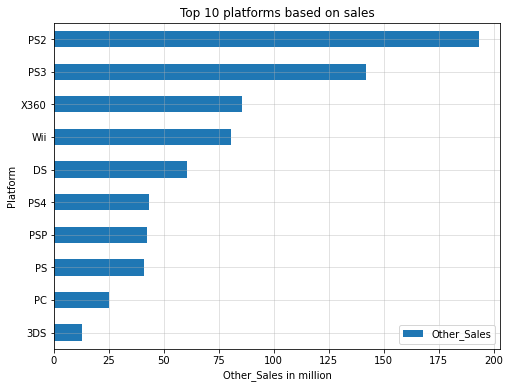

In [234]:
platform_and_sales(df, 'Other_Sales')

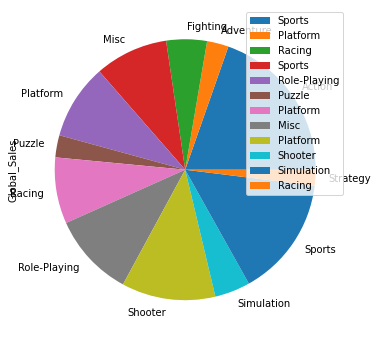

In [251]:
# Question 5: Pie chart based on Genre

def genre_sale_dist(dataset, region):
    data = dataset.copy()
    data.groupby('Genre')[region].sum().plot.pie(y=region, figsize=(6,6))
    plt.legend(data['Genre'])
genre_sale_dist(df, 'Global_Sales')

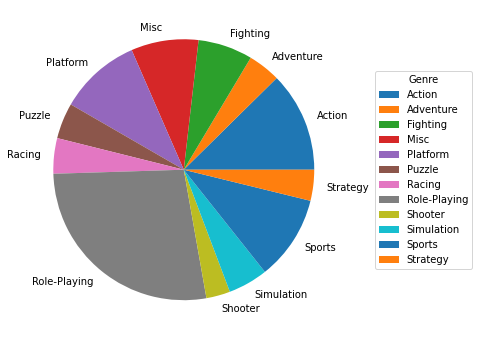

In [285]:
def genre_sale_dist(dataset, region):
    data = dataset.copy()
    d=data.groupby('Genre')[region].sum()
    plt.figure(figsize=(6,6))
    plt.pie(d, labels=d.index)
    plt.legend(d.index, title="Genre",
          loc="center right", bbox_to_anchor=(1, 0, 0.4, 1))
    plt.show()

genre_sale_dist(df, 'JP_Sales')